# Universidade Federal de Juiz de Fora
## Introdução aos Métodos Discretos
### Trabalho 1: Detection of Skin Burn Injury
### Alunos: Matheus Muniz Damasco
### Professores: Ruy Freitas Reis e Joventino de Oliveira Campos

# 1. Introdução


Os métodos térmicos de medição de temperatura na superfície da pele têm se destacado como uma alternativa mais atraente em comparação com outras formas de termometria não invasiva, como a ressonância magnética, micro-ondas e ultrassom. Essa preferência se deve principalmente por serem métodos mais econômicos e seguros.


Para aplicar esses métodos, precisamos resolver algumas equações complexas, conhecidas como equações bio-térmicas, que consideram as condições internas do corpo e as condições de contorno específicas. A equação de Pennes, proposta em 1948, é uma ferramenta para prever como o calor se comporta nos tecidos vivos.



## Motivação

O estudo do comportamento da temperatura em tecidos biológicos é muito importante em áreas como a medicina e a engenharia biomédica, especialmente no contexto do diagnóstico e tratamento de condições como queimaduras, tumores e outras lesões cutâneas. Métodos para prever a distribuição de temperatura em tecidos vivos são úteis para aprimorar técnicas de diagnóstico não invasivo, permitindo intervenções mais rápidas e eficazes.

No nosso trabalho, vamos focar na aplicação do Método de Diferenças Finitas (FDM) para diagnósticos térmicos de tumores. Sabemos que a presença de um tumor pode alterar a forma como o sangue flui e como o calor é gerado no corpo. Isso faz com que a distribuição de temperatura na pele seja diferente do normal. Essa diferença pode ser valiosa para diagnósticos não invasivos dos tumores.


## Estrutura do Trabalho
- **Seção 1 (Introdução e Motivação):** Apresenta uma introdução para o nosso trabalho além da nossa motivação em ter escolhido esse tema e um pouco da contextualização.
- **Seção 2 (Desafio Proposto):** Apresenta uma explicação do desafio abordado em nosso trabalho.
- **Seção 3 (Métodos Numéricos e Algoritmos):**  Descreve as abordagens numéricas e os algoritmos implementados para resolver o desafio proposto, com foco no Método de Diferenças Finitas (FDM) e outras técnicas relevantes.
- **Seção 4 (Comparações):** Apresenta uma análise comparativa dos resultados.
- **Seção 5 (Conclusões):** Fornece um resumo dos principais achados do trabalho, discutindo as implicações dos resultados.
- **Seção 6 (Referências):** Referências que foram usadas no nosso projeto.

# 2. Desafio Proposto

## Detection of skin burn injury

Este trabalho se concentra na resolução da Equação de Pennes no estado estacionário, focando especificamente na detecção de lesões térmicas na pele, como tumores. O artigo base utilizado neste desafio pode ser acessado no link abaixo:

[An RBF–MFS Model for Analysing Yhermal Behaviour of Skin Tissues](https://www.sciencedirect.com/science/article/pii/S0017931009006966)


* Objetivos:
  - Resolver a Equação de Pennes sem a derivada em relação ao tempo.
  - Reproduzir a Fig. 8. Steady State Temperature Distributions of Healthy and Tumor Tissue

# 3. Métodos Numéricos e Algoritmos

Nesta seção, discutimos a formulação da equação de Pennes e sua modificação para o estado estacionário, utilizada para simular o comportamento térmico de tecidos biológicos, levando em conta os efeitos da perfusão sanguínea e da geração de calor metabólico.

## Formulação da Equação de Pennes no Estado Estacionário

- Equação de Pennes Originalmente:
  - $ρc \frac{∂u(x,t)}{∂t} =∇⋅[k∇u(x,t)]+ω_b ρ_b c_b[u_a−u(x,t)]+Q_m+Q_r(x,t)$

- Equação de Pennes no Estado Estacionário (Sem a derivada Temporal e sem o Qr):
  - $0 = ∇⋅[k∇u(x)]+ω_b ρ_b c_b[u_a−u(x)]+Q_m$

Na equação acima:

- $ρ$, $c$ e $k$ representam, respectivamente, a densidade, o calor específico e a condutividade térmica do tecido.
- $ω_b$, $ρ_b$ e $c_b$ referem-se à perfusão sanguínea, à densidade, e ao calor específico do sangue.
-  $u_a$ é a temperatura arterial, considerada constante, $u(x)$ é a temperatura do tecido no estado estacionário.
- $Q_m$ é a geração de calor metabólico e $Q_r(x)$ representa a fonte de calor decorrente do aquecimento espacial, considerado sem a variável temporal devido ao estado estacionário.
- $Q_r$ não será considerado em nosso trabalho.

## Discretizar a Equação Usando o Método de Diferenças Finitas (FDM)

No contexto do problema discutido no nosso artigo base, estamos analisando a distribuição de temperatura em tecidos biológicos para detectar lesões térmicas como tumores, o domínio 2D a ser considerado é a região da pele onde essa distribuição de temperatura será analisada.

  - Forma Final da Equação Discretizada:

    Ao reorganizar os termos para isolar $u_{i,j}$ e considerando $Δx = Δy = h$,
    chegamos à forma final da equação discretizada que é utilizada para calcular a temperatura em cada ponto $(i,j)$:

    $u_{i,j} = \frac{(\frac{k⋅(u_{i+1,j} + u_{i-1,j}+ u_{i,j-1}+ u_{i,j+1})}{h^2}+{(ω_b⋅ρ_b⋅c_b⋅u_a+Q_m)})}{4⋅ \frac{k}{h^2} + ω_b⋅ρ_b⋅c_b}$


- ### Condições de Contorno:
    - Neumann:
      - $q(x_1,x_2;0) = 0,\qquad x_1,x_2 ∈ I, II, IV$
    - Dirichlet:
      - $u(x_1,x_2;0) = 37°C,\qquad x_1,x_2 ∈ III$

- ### Valores das Variaveis:
  - A malha do nosso modelo ficou com o comprimento ao longo do eixo $x$ de $0.08 (m)$ e o comprimento ao longo do eixo y de $0.03 (m)$.

  -  Para um tecido com tumor, podemos definir $L \subseteq \left\{ |x_2| \leq 0.01 \, \text{m}, \, 0.005 \, \text{m} \leq x_1 \leq 0.015 \, \text{m} \right\}$

  - $k$ é a condutividade térmica do tecido, com valor de $0.5W/(m°C)$.

  - $ω_b$ é a perfusão sanguínea é mencionada como  $0.0005 m^3/s/m^3$  para tecido saudável e  $0.002 m^3/s/m^3$  para tecido tumoral.
  
  - $ρ = ρ_b$ é a densidade do sangue aonde nos usamos $1000 kg/m^3$ .
  
  - $c = c_b$ é o calor específico do sangue é $4000J/(kg°C)$.
  
  - $u_a = u_c = u_0 $ são referentes a temperatura arterial, temperatura do ambiente e temperatura inicial, respectivamente e são considerados constantes em $37°C$.

  - $Q_m$ é referente a geração de calor metabólica e os seus valores usados foram $420 W/m^3$  para tecido saudável e $4200 W/m^3$  para tecido tumoral.


31 81
Convergiu em 2170 iterações.
Convergiu em 2050 iterações.


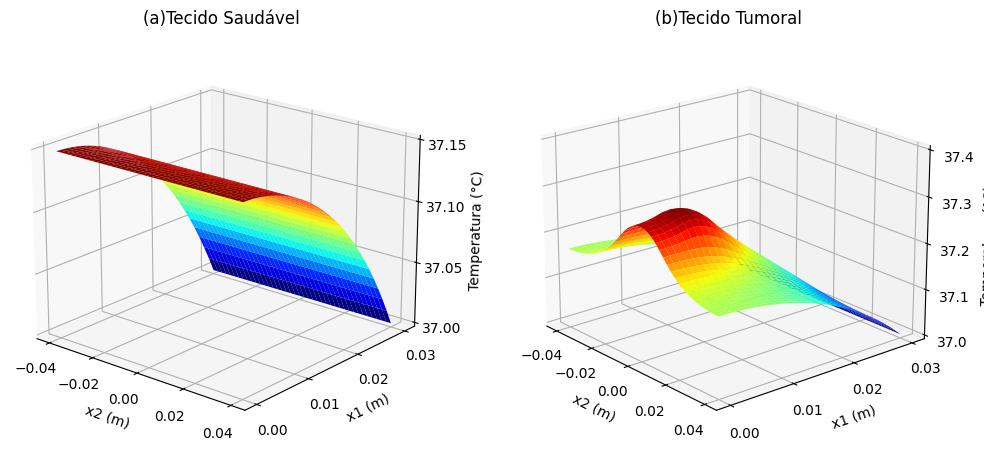

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros do modelo
Lx_2 = 0.08  # comprimento em x
Lx_1 = 0.03  # comprimento em y

Nx_2 = int(Lx_2 / 0.001) + 1
Nx_1 = int(Lx_1 / 0.001) + 1

print(Nx_1, Nx_2)

max_iter = 10000  # Máximo de iterações
tolerance = 1e-8  # Critério de convergência
pb = 1000  # Densidade do sangue (kg/m^3)
cb = 4000  # Calor específico do sangue (J/kg°C)

# Condição de Contorno
u1 = 0  # Esquerda Neumann
u2 = 0  # Topo Neumann
u3 = 37.0  # Direita Dirichlet
u4 = 0  # Base Neumann

# Parâmetros para tecido saudável
k_healthy = 0.5
wb_healthy = 0.0005
Q_m_healthy = 420
u_0_healthy = 37.0  # Temperatura inicial (°C)
ua_healthy = 37.0  # Temperatura arterial (°C)

# Parâmetros para tecido tumoral
k_tumor = 0.5
wb_tumor = 0.002
Q_m_tumor = 4200
u_0_tumor = 37.0  # Temperatura inicial (°C)
ua_tumor = 37.0  # Temperatura arterial (°C)

def simular_tecido_saudavel(k, wb, Q_m, ua, u_0, pb, cb, u1, u2, u3, u4):
    h = 0.001
    dx_1 = 0.001
    dx_2 = 0.001

    # Inicialização
    u = np.ones((Nx_1, Nx_2)) * u_0
    for iteration in range(max_iter):
        u_old = np.copy(u)
        for i in range(Nx_1):
            for j in range(Nx_2):
                # Condição de Dirichlet na borda direita
                if i == Nx_1 - 1:
                    u[i, j] = u3
                else:
                    # Condições de Neumann nas outras bordas
                    uijp = u[i, j + 1] if j < Nx_2 - 1 else 2 * h * u1 + u[i, Nx_2 - 1]
                    uijm = u[i, j - 1] if j > 0 else 2 * h * u2 + u[i, 1]
                    uipj = u[i + 1, j]
                    uimj = u[i - 1, j] if i > 0 else 2 * h * u4 + u[1, j]
                    u[i, j] = (k * (uipj + uimj + uijp + uijm) / h**2 + (wb * pb * cb * ua + Q_m)) / (4 * k / h**2 + wb * pb * cb)

        # Verificação de convergência
        if np.linalg.norm(u_old - u, np.inf) / np.linalg.norm(u_old, np.inf) < tolerance:
            print(f"Convergiu em {iteration} iterações.")
            break
    return u

def simular_tecido_com_tumor(k, wb_healthy, wb_tumor, Q_m_tumor, Q_m_healthy, ua, u_0, pb, cb, u1, u2, u3, u4):
    h = 0.001
    dx_1 = 0.001
    dx_2 = 0.001

    # Inicialização
    u = np.ones((Nx_1, Nx_2)) * u_0
    for iteration in range(max_iter):
        u_old = np.copy(u)
        for i in range(Nx_1):
            for j in range(Nx_2):
                x2 = (j - Nx_2 // 2) * dx_2
                x1 = i * dx_1

                # Verificação se o ponto está na área do tumor
                if 0.005 <= x1 <= 0.01 and -0.01 <= x2 <= 0.010:
                    wb_local = wb_tumor
                    Q_m = Q_m_tumor
                else:
                    wb_local = wb_healthy
                    Q_m = Q_m_healthy

                if i == Nx_1 - 1:
                    u[i, j] = u3
                else:
                    # Condições de Neumann nas outras bordas
                    uijp = u[i, j + 1] if j < Nx_2 - 1 else 2 * h * u1 + u[i, Nx_2 - 1]
                    uijm = u[i, j - 1] if j > 0 else 2 * h * u2 + u[i, 1]
                    uipj = u[i + 1, j]
                    uimj = u[i - 1, j] if i > 0 else 2 * h * u4 + u[1, j]
                    u[i, j] = (k * (uipj + uimj + uijp + uijm) / h**2 + (wb_local * pb * cb * ua + Q_m)) / (4 * k / h**2 + wb_local * pb * cb)

        # Verificação de convergência
        if np.linalg.norm(u_old - u, np.inf) / np.linalg.norm(u_old, np.inf) < tolerance:
            print(f"Convergiu em {iteration} iterações.")
            break
    return u

# Simulação do tecido saudável
u_healthy = simular_tecido_saudavel(k_healthy, wb_healthy, Q_m_healthy, ua_healthy, u_0_healthy, pb, cb, u1, u2, u3, u4)

# Simulação do tecido tumoral
u_tumor = simular_tecido_com_tumor(k_tumor, wb_healthy, wb_tumor, Q_m_tumor, Q_m_healthy, ua_tumor, u_0_tumor, pb, cb, u1, u2, u3, u4)

# Geração de malha para o gráfico 3D
X_2 = np.linspace(-Lx_2 / 2, Lx_2 / 2, Nx_2)
X_1 = np.linspace(0, Lx_1, Nx_1)
X_1, X_2 = np.meshgrid(X_1, X_2)

# Ajuste das formas
u_healthy = np.transpose(u_healthy)
u_tumor = np.transpose(u_tumor)

# Aumentando o tamanho do gráfico
fig = plt.figure(figsize=(12, 9))

# Gráfico 3D para tecido saudável
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X_2, X_1, u_healthy, cmap='jet')
ax.set_xlabel('x2 (m)')
ax.set_ylabel('x1 (m)')
ax.set_zlabel('Temperatura (°C)')
ax.set_title('(a)Tecido Saudável')
ax.set_zlim(37, 37.15)
ax.zaxis.set_ticks(np.arange(37, 37.16, 0.05))
ax.xaxis.set_ticks(np.arange(-0.04, 0.05, 0.02))
ax.yaxis.set_ticks(np.arange(0, 0.04, 0.01))
ax.view_init(elev=20, azim=-50)

# Gráfico 3D para tecido tumoral
ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(X_2, X_1, u_tumor, cmap='jet')
ax.set_xlabel('x2 (m)')
ax.set_ylabel('x1 (m)')
ax.set_zlabel('Temperatura (°C)')
ax.set_title('(b)Tecido Tumoral')
ax.set_zlim(37, 37.15)
ax.zaxis.set_ticks(np.arange(37, 37.5, 0.1))
ax.xaxis.set_ticks(np.arange(-0.04, 0.05, 0.02))
ax.yaxis.set_ticks(np.arange(0, 0.04, 0.01))
ax.view_init(elev=20, azim=-40)

plt.show()

# 4. Comparações

A análise comparativa entre os gráficos apresentados neste trabalho e os gráficos do artigo base mostram que  conseguimos atingir os resultados propostos no nosso desafio, confirmando a eficácia da nossa implementação. Visualmente podemos observar que as distribuições das nossas temperaturas ao longo do gráfico estão seguindo conforme nosso artigo base.



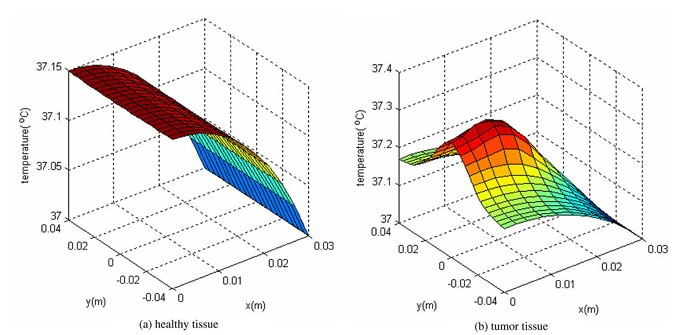

# 5. Conclusões

Este trabalho foca na aplicação do método de diferenças finitas (FDM) para diagnósticos térmicos em lesões como tumores. Embora o Método de Diferenças Finitas (FDM) ofereça simplicidade e eficiência em muitos contextos, sua principal limitação reside na dificuldade de lidar com geometrias complexas e arbitrárias. Isso ocorre devido aos desafios de interpolação entre os contornos e os pontos interiores, especialmente ao desenvolver expressões de diferenças finitas para os nós próximos às bordas do domínio.

O método de diferenças finitas (FDM) que nós escolhemos, quando aplicado para resolver a equação de Pennes no estado estacionário permitiu uma simulação eficiente da distribuição de temperatura em tecidos biológicos, tanto em condições saudáveis quanto em condições de tecidos tumorais. Os resultados obtidos são consistentes com os apresentados no nosso artigo que usamos como base, demonstrando que o método de diferenças finitas (FDM) que escolhemos foi capaz de capturar com precisão os efeitos térmicos relevantes nos dois tipos diferentes de tecidos.

# 6. Refêrencias
* [Artigo - RBF-MFS](https://www.researchgate.net/publication/239350866_An_RBF-MFS_model_for_analysing_thermal_behaviour_of_skin_tissues)